Paula Capuano de Macedo

Vagner Natanael Martins Santos

## Exercício 1 - Aprendizado Supervisionado

### EDA - Análise do Dataset para avaliar que tratamentos podem ser feitos nas colunas e valores.

In [1]:
import pandas as pd

#Lendo o CSV e vendo quantas entradas temos.
df_credito = pd.read_csv('./exercicio_1/train.csv')
print('Dataframe shape', df_credito.shape)

# Ver as 10 primeiras linhas para se ter uma primeira impressão do dataset
print('\n',df_credito.head(10))

Dataframe shape (100000, 28)

        ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12       

C:\Users\Vagner\AppData\Local\Temp\ipykernel_26600\1552759603.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credito = pd.read_csv('./exercicio_1/train.csv')


Ao listarmos as colunas acima, identificamos que algumas delas são identificadores únicos, como ID, Customer_ID, Name e SSN. Essas colunas serão excluídas antes de rodarmos o modelo.

In [2]:
# Tratando os nomes das colunas para ficar mais fácil
df_credito.columns = df_credito.columns.str.lower()
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  object 
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  object 
 8   monthly_inhand_salary     84998 non-null   float64
 9   num_bank_accounts         100000 non-null  int64  
 10  num_credit_card           100000 non-null  int64  
 11  interest_rate             100000 non-null  int64  
 12  num_of_loan               100000 non-null  object 
 13  type_of_loan              88592 non-null   ob

Várias colunas acima estão com tipo Object, mas deveria ser tipo numérico (como int ou float). Precisamos transformar essas colunas para podermos trabalhar com dados numéricos.

In [3]:
df_credito.isnull().sum() 

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

Acima podemos ver que várias colunas possuem dados nulos. Esses dados precisam ser tratados antes de rodarmos o modelo. A estratégia será feita de acordo com o tipo de coluna (por exemplo, se númerica, podemos trocar pela mediana, se categórica, pelo valor que mais aparece).

In [4]:
# Quantidade de resgistros únicos por coluna

for _ in df_credito.columns:
    print(f'{_}: {len(df_credito[_].unique())} ')

id: 100000 
customer_id: 12500 
month: 8 
name: 10140 
age: 1788 
ssn: 12501 
occupation: 16 
annual_income: 18940 
monthly_inhand_salary: 13236 
num_bank_accounts: 943 
num_credit_card: 1179 
interest_rate: 1750 
num_of_loan: 434 
type_of_loan: 6261 
delay_from_due_date: 73 
num_of_delayed_payment: 750 
changed_credit_limit: 4384 
num_credit_inquiries: 1224 
credit_mix: 4 
outstanding_debt: 13178 
credit_utilization_ratio: 100000 
credit_history_age: 405 
payment_of_min_amount: 3 
total_emi_per_month: 14950 
amount_invested_monthly: 91050 
payment_behaviour: 7 
monthly_balance: 98793 
credit_score: 3 


In [5]:
# Quais são os registros únicos por coluna?
for _ in df_credito.columns:
    unique_regs = df_credito[_].unique()
    print(f'\n{_}')
    if (len(unique_regs)< 30):
        print(unique_regs)
    else:
        print(unique_regs[:30])


id
['0x1602' '0x1603' '0x1604' '0x1605' '0x1606' '0x1607' '0x1608' '0x1609'
 '0x160e' '0x160f' '0x1610' '0x1611' '0x1612' '0x1613' '0x1614' '0x1615'
 '0x161a' '0x161b' '0x161c' '0x161d' '0x161e' '0x161f' '0x1620' '0x1621'
 '0x1626' '0x1627' '0x1628' '0x1629' '0x162a' '0x162b']

customer_id
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100'
 'CUS_0x132f' 'CUS_0xa16e' 'CUS_0xac86' 'CUS_0x5b48' 'CUS_0xa5f9'
 'CUS_0x4d43' 'CUS_0xb95f' 'CUS_0x3edc' 'CUS_0xbffe' 'CUS_0xb681']

month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

name
['Aaron Maashoh' nan 'Rick Rothackerj' 'Langep' 'Jasond' 'Deepaa' 'Np'
 'Nadiaq' 'Annk' 'Charlie Zhur' 'Jamesj' 'Saphirj' 'Soyoungd'
 'Harriet McLeodd' 'Sinead Carews' 'Poornimaf' 'Chalmersa' 'Parkm'
 'Patrickg' 'Laurence Frosty' 'Re

Algumas análises que podemos fazer a partir dessa visualização:

    Month: Só temos os meses de janeiro a agosto. Vamos dropar essa coluna, pois está incompleto.

    Age: temos valores negativos, muito altos e valores com underline.
    
    Occupation: temos o valor '_______'. Será trocado por 'unknown'.

    Number of bank accounts: existem vários clientes com valores estranhos, abaixo de zero ou acima de 100 contas bancárias.

    Number of credit card: idem contas bancárias.

    Type of loan: uma coluna que repete várias vezes o mesmo valor em suas células.

    Credit History Age: está como string, poderia ser transformada em número (de meses ou anos) para melhor análise.
    
    Payment of min amount: temos o valor NM (provavelmente Not Mentioned) equivalente ao Unknown. 

In [6]:
# Os 10 valores que mais aparecem em cada coluna

for _ in df_credito.columns:
    if len(df_credito[_].unique()) < df_credito.shape[0]:
        print(f'\n{_}')
        print(df_credito[_].value_counts(1).head(10))


customer_id
customer_id
CUS_0xd40     0.00008
CUS_0x9bf4    0.00008
CUS_0x5ae3    0.00008
CUS_0xbe9a    0.00008
CUS_0x4874    0.00008
CUS_0xc67b    0.00008
CUS_0x8a64    0.00008
CUS_0x35ea    0.00008
CUS_0x5044    0.00008
CUS_0x9dfd    0.00008
Name: proportion, dtype: float64

month
month
January     0.125
February    0.125
March       0.125
April       0.125
May         0.125
June        0.125
July        0.125
August      0.125
Name: proportion, dtype: float64

name
name
Langep                0.000489
Stevex                0.000489
Vaughanl              0.000433
Jessicad              0.000433
Raymondr              0.000422
Danielz               0.000422
Deepa Seetharamanm    0.000422
Jessica Wohlt         0.000422
Nate Raymondw         0.000411
Nicko                 0.000411
Name: proportion, dtype: float64

age
age
38    0.02833
28    0.02829
31    0.02806
26    0.02792
32    0.02749
25    0.02737
36    0.02720
35    0.02716
34    0.02707
27    0.02707
Name: proportion, dtype: floa

In [7]:
# Imprimir quantidade nulos por coluna

for _ in df_credito.columns:
    print(f'{_}: {df_credito[_].isna().sum()}/{df_credito.shape[0]}') 

id: 0/100000
customer_id: 0/100000
month: 0/100000
name: 9985/100000
age: 0/100000
ssn: 0/100000
occupation: 0/100000
annual_income: 0/100000
monthly_inhand_salary: 15002/100000
num_bank_accounts: 0/100000
num_credit_card: 0/100000
interest_rate: 0/100000
num_of_loan: 0/100000
type_of_loan: 11408/100000
delay_from_due_date: 0/100000
num_of_delayed_payment: 7002/100000
changed_credit_limit: 0/100000
num_credit_inquiries: 1965/100000
credit_mix: 0/100000
outstanding_debt: 0/100000
credit_utilization_ratio: 0/100000
credit_history_age: 9030/100000
payment_of_min_amount: 0/100000
total_emi_per_month: 0/100000
amount_invested_monthly: 4479/100000
payment_behaviour: 0/100000
monthly_balance: 1200/100000
credit_score: 0/100000


### Pré-processamento dos dados

In [8]:
import numpy as np

#feature selection - dropar as colunas de identificador único e que não serão utilizadas (month)
df_credito = df_credito.drop(columns=['id','customer_id', 'month', 'name', 'ssn'])

Tratamento dos dados categóricos

In [9]:
#tratamento da coluna type_of_loan
df_credito['type_of_loan'] = df_credito['type_of_loan'].fillna('Unknown Loan')
df_credito['type_of_loan'] = df_credito['type_of_loan'].replace(', ', ',', regex=True)
df_credito['type_of_loan'] = df_credito['type_of_loan'].replace('and ', '', regex=True)

#separando occupation em colunas independentes e binárias
loan_dummies = df_credito['type_of_loan'].str.get_dummies(',')
loan_dummies.columns = loan_dummies.columns.str.lower() #vamos usar essa coluna lá em baixo para tratar a coluna num_of_loan

#associar a nova coluna ao dataframe
df_credito = pd.concat([df_credito, loan_dummies], axis=1)
df_credito = df_credito.drop(columns=['type_of_loan'])

obs:

havíarmos testado fazer a dummização das demais colunas categóricas, como:
- occupation
- payment behaviour
- credit mix
- payment of min amount

entretamos percebemos que o código ficava com +de 70features e impossível de rodar em nossas máquinas devido ao alto número de colunas, então preferimos utilizar o OneHotEncoder para codificar essas colunas.

Além disso também há o fato de que essas outras colunas possuem menos variação de valores entre si, enquanto a coluna type_of_loan precisou da dummização pois agregava informações sobre vários tipos de empréstimos em apenas 1 feature, o que poderia tornar o modelo mais complexo para ser treinado, separando em features diferentes e booleanas facilitaria o processo de treinamento pro algoritmo.

Tratamento dos dados numéricos

In [10]:
#tratamento dos valores que possuem '_' no final das colunas numéricas
df_credito = df_credito.applymap(lambda x: str(x).rstrip('_'))
df_credito.replace('nan', np.nan, inplace=True)

In [11]:
#transformar colunas numéricas em numéricas, de fato
def to_numeric(dataframe, columns):
    for column_name in columns:
        dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')
    return dataframe


numeric_columns = ['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
                    'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
                    'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'total_emi_per_month',
                    'amount_invested_monthly', 'monthly_balance']

to_numeric(df_credito, numeric_columns)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,auto loan,credit-builder loan,debt consolidation loan,home equity loan,mortgage loan,not specified,payday loan,personal loan,student loan,unknown loan
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,1,1,0,1,0,0,0,1,0,0
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,1,1,0,1,0,0,0,1,0,0
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7.0,...,1,1,0,1,0,0,0,1,0,0
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,...,1,1,0,1,0,0,0,1,0,0
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,...,1,0,0,0,0,0,0,0,1,0
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,...,1,0,0,0,0,0,0,0,1,0
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,...,1,0,0,0,0,0,0,0,1,0
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,NaN,...,1,0,0,0,0,0,0,0,1,0


In [12]:
#arredondar valores numéricos para 2 casas decimais para evitar overfitting
df_credito['monthly_inhand_salary'] = df_credito['monthly_inhand_salary'].round(2)
df_credito['total_emi_per_month'] = df_credito['total_emi_per_month'].round(2)
df_credito['credit_utilization_ratio'] = df_credito['credit_utilization_ratio'].round(2)
df_credito['amount_invested_monthly'] = df_credito['amount_invested_monthly'].round(2)
df_credito['monthly_balance'] = df_credito['monthly_balance'].round(2)
df_credito['annual_income'] = df_credito['annual_income'].round(2)
df_credito['changed_credit_limit'] = df_credito['changed_credit_limit'].round(2)

In [13]:
#transformar valores negativos exdrúxulos em nulos
def limit_values(dataframe, column_name, min_number):
    dataframe.loc[dataframe[column_name] <= min_number, column_name] = np.nan
    return dataframe

#coluna age -> mínimo de 17
limit_values(df_credito,'age', 17)

#coluna num_bank_accounts -> mínimo de 0
limit_values(df_credito,'num_bank_accounts', 0)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,auto loan,credit-builder loan,debt consolidation loan,home equity loan,mortgage loan,not specified,payday loan,personal loan,student loan,unknown loan
0,23.0,Scientist,19114.12,1824.84,3.0,4,3,4,3,7.0,...,1,1,0,1,0,0,0,1,0,0
1,23.0,Scientist,19114.12,NaN,3.0,4,3,4,-1,NaN,...,1,1,0,1,0,0,0,1,0,0
2,NaN,Scientist,19114.12,NaN,3.0,4,3,4,3,7.0,...,1,1,0,1,0,0,0,1,0,0
3,23.0,Scientist,19114.12,NaN,3.0,4,3,4,5,4.0,...,1,1,0,1,0,0,0,1,0,0
4,23.0,Scientist,19114.12,1824.84,3.0,4,3,4,6,NaN,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.42,4.0,6,7,2,23,7.0,...,1,0,0,0,0,0,0,0,1,0
99996,25.0,Mechanic,39628.99,3359.42,4.0,6,7,2,18,7.0,...,1,0,0,0,0,0,0,0,1,0
99997,25.0,Mechanic,39628.99,3359.42,4.0,6,5729,2,27,6.0,...,1,0,0,0,0,0,0,0,1,0
99998,25.0,Mechanic,39628.99,3359.42,4.0,6,7,2,20,NaN,...,1,0,0,0,0,0,0,0,1,0


In [14]:
# tratamento da coluna credit_history_age (vamos transformar em anos)

import re

def convert_to_years(value):
    if pd.notna(value):
        match = re.match(r'(\d+) Years and (\d+) Months', value)
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            return round(years + months / 12, 1)
    return value

df_credito['credit_history_years'] = df_credito['credit_history_age'].apply(convert_to_years)
df_credito = df_credito.drop(columns=['credit_history_age'])

In [15]:
#ajustar a coluna num_of_loan
df_credito['num_of_loan'] = loan_dummies.iloc[:, 0:].sum(axis=1)

In [16]:
#transformação do problema em um problema binário de classificação, para podermos utilizarmos a métrica AUC
df_credito['credit_score'] = df_credito['credit_score'].map(lambda x: 0 if x == 'Poor' else 1)

### Aplicação do Aprendizado de Máquina Supervisionado

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.svm import SVC

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

In [18]:
#função para automatizar as métricas
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    print("\nMétricas de avaliação de treino:")
    y_pred_train = estimator.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    ConfusionMatrixDisplay(cm_train).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_train, y_pred_train))
    auc_roc = roc_auc_score(y_train, y_pred_train)
    print("AuC:", auc_roc)

    print("\nMétricas de avaliação de teste:")
    y_pred_test = estimator.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm_test).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_test, y_pred_test))
    auc_roc = roc_auc_score(y_test, y_pred_test)
    print("AuC:", auc_roc)

SVM

In [19]:
#carregamento dos dados
df = df_credito.copy()

#seleção de uma amostra devido o custo necessário para o conjunto completo
df = df.sample(5000)

#definição das features e target
X = df.drop(columns="credit_score")
y = df["credit_score"]

#divisião dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
##pré-processamento dos dados de treino
#features numéricas
features_numerics = X_train.select_dtypes(include=np.number).columns.tolist()

num_imputer = SimpleImputer(strategy="median")
X_train[features_numerics] = num_imputer.fit_transform(X_train[features_numerics])

scaler = StandardScaler()
X_train[features_numerics] = scaler.fit_transform(X_train[features_numerics])

#features categóricas
features_categorics = X_train.select_dtypes(exclude=np.number).columns.tolist()
encoder = OneHotEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train[features_categorics])

#combinação das features numéricas e categóricas pós-transformação
X_train_preprocessed = np.hstack((X_train[features_numerics], X_train_cat_encoded.toarray()))

In [21]:
#pré-processamento dos dados de teste
X_test[features_numerics] = num_imputer.transform(X_test[features_numerics])
X_test[features_numerics] = scaler.transform(X_test[features_numerics])
X_test_cat_encoded = encoder.transform(X_test[features_categorics])

#combinação das features numéricas e categóricas pós-transformação
X_test_preprocessed = np.hstack((X_test[features_numerics], X_test_cat_encoded.toarray()))


Métricas de avaliação de treino:


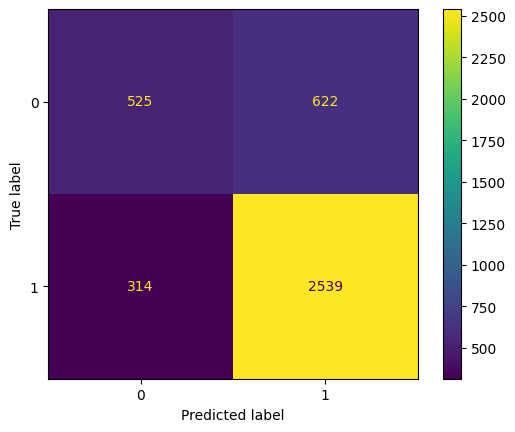

              precision    recall  f1-score   support

           0       0.63      0.46      0.53      1147
           1       0.80      0.89      0.84      2853

    accuracy                           0.77      4000
   macro avg       0.71      0.67      0.69      4000
weighted avg       0.75      0.77      0.75      4000

AuC: 0.6738280969480726

Métricas de avaliação de teste:


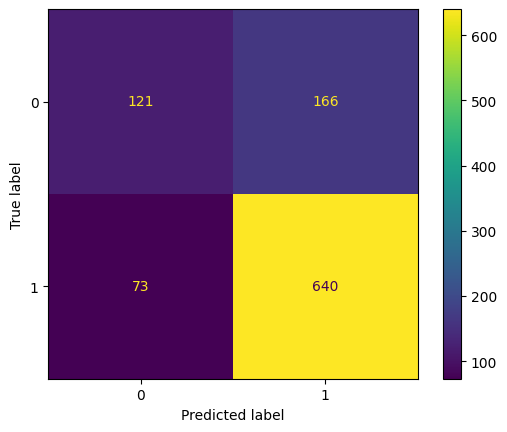

              precision    recall  f1-score   support

           0       0.62      0.42      0.50       287
           1       0.79      0.90      0.84       713

    accuracy                           0.76      1000
   macro avg       0.71      0.66      0.67      1000
weighted avg       0.75      0.76      0.75      1000

AuC: 0.6596092478656703


In [22]:
#treinando o modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_preprocessed, y_train)

#avaliação do modelo com as métricas de classificação
metricas_classificacao(svm_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

In [23]:
#testando os hiperparâmetros
param_grid_svc = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': np.logspace(-1, 1, 3),
    'gamma': ['scale', 'auto'] + np.logspace(-1, 1, 3).tolist()
}

splitter = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid_svc = GridSearchCV(
    estimator = SVC(random_state = 42),
    param_grid = param_grid_svc,
    scoring = 'roc_auc',
    cv = splitter
)

Melhores hiperparâmetros: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

Métricas de avaliação de treino:


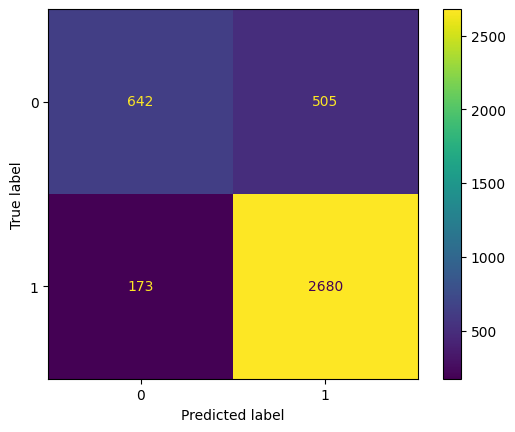

              precision    recall  f1-score   support

           0       0.79      0.56      0.65      1147
           1       0.84      0.94      0.89      2853

    accuracy                           0.83      4000
   macro avg       0.81      0.75      0.77      4000
weighted avg       0.83      0.83      0.82      4000

AuC: 0.7495415431713387

Métricas de avaliação de teste:


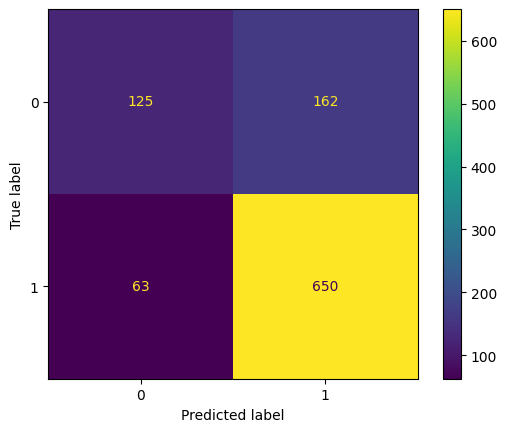

              precision    recall  f1-score   support

           0       0.66      0.44      0.53       287
           1       0.80      0.91      0.85       713

    accuracy                           0.78      1000
   macro avg       0.73      0.67      0.69      1000
weighted avg       0.76      0.78      0.76      1000

AuC: 0.6735905117015506


In [24]:
#treinamento do modelo
grid_svc.fit(X_train_preprocessed, y_train)

#definição do melhor hiperparâmetro
best_params = grid_svc.best_params_
best_model = grid_svc.best_estimator_
svm_model.fit(X_train_preprocessed, y_train)
print('Melhores hiperparâmetros:', best_params)

#avaliação do modelo com os best params
metricas_classificacao(best_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

XGBoosting

In [25]:
#carregamento dos dados
df = df_credito.copy()

#definição das features e target
X = df.drop(columns="credit_score")
y = df["credit_score"]

#divisião dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
##pré-processamento dos dados de treino
#features numéricas
features_numerics = X_train.select_dtypes(include=np.number).columns.tolist()

num_imputer = SimpleImputer(strategy="median")
X_train[features_numerics] = num_imputer.fit_transform(X_train[features_numerics])

scaler = StandardScaler()
X_train[features_numerics] = scaler.fit_transform(X_train[features_numerics])

#features categóricas
features_categorics = X_train.select_dtypes(exclude=np.number).columns.tolist()
encoder = OneHotEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train[features_categorics])

#combinação das features numéricas e categóricas pós-transformação
X_train_preprocessed = np.hstack((X_train[features_numerics], X_train_cat_encoded.toarray()))

In [27]:
#pré-processamento dos dados de teste
X_test[features_numerics] = num_imputer.transform(X_test[features_numerics])
X_test[features_numerics] = scaler.transform(X_test[features_numerics])
X_test_cat_encoded = encoder.transform(X_test[features_categorics])

#combinação das features numéricas e categóricas pós-transformação
X_test_preprocessed = np.hstack((X_test[features_numerics], X_test_cat_encoded.toarray()))


Métricas de avaliação de treino:


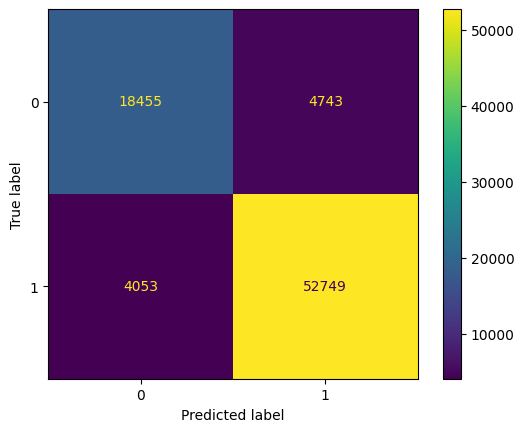

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     23198
           1       0.92      0.93      0.92     56802

    accuracy                           0.89     80000
   macro avg       0.87      0.86      0.87     80000
weighted avg       0.89      0.89      0.89     80000

AuC: 0.8620947989154826

Métricas de avaliação de teste:


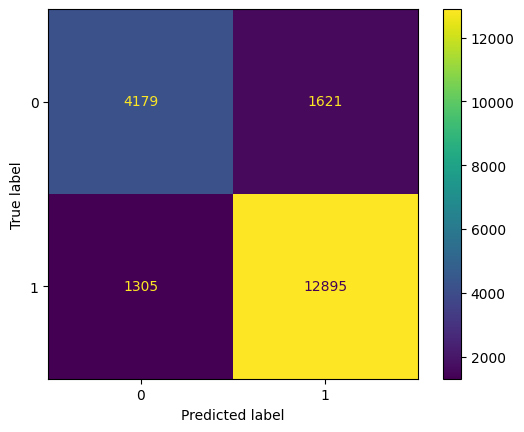

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      5800
           1       0.89      0.91      0.90     14200

    accuracy                           0.85     20000
   macro avg       0.83      0.81      0.82     20000
weighted avg       0.85      0.85      0.85     20000

AuC: 0.8143079164643031


In [28]:
#treinando o modelo SVM
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train)

#avaliação do modelo com as métricas de classificação
metricas_classificacao(xgb_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

In [29]:
#testando os hiperparâmetros
param_grid_xgb = {
    'eta': np.logspace(-2, 2, 5).tolist(),
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5]
}

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_xgb = GridSearchCV(
    estimator = XGBClassifier(random_state = 42),
    param_grid = param_grid_xgb,
    scoring = 'roc_auc',
    cv = splitter
)

Melhores hiperparâmetros: {'eta': 0.1, 'max_depth': 10, 'min_child_weight': 1}

Métricas de avaliação de treino:


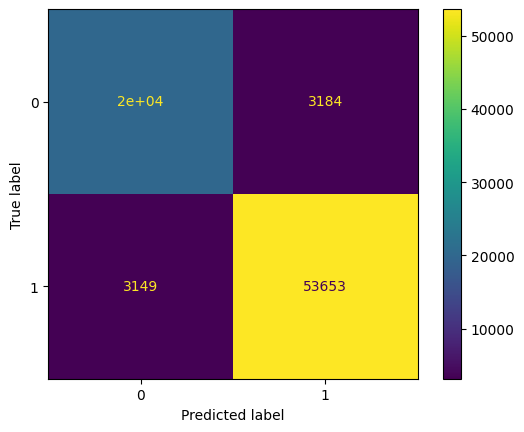

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     23198
           1       0.94      0.94      0.94     56802

    accuracy                           0.92     80000
   macro avg       0.90      0.90      0.90     80000
weighted avg       0.92      0.92      0.92     80000

AuC: 0.9036542998600412

Métricas de avaliação de teste:


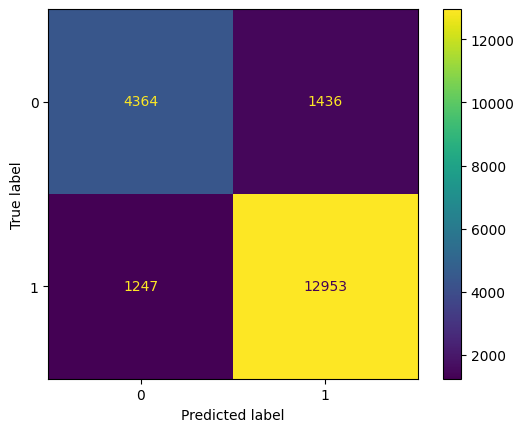

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      5800
           1       0.90      0.91      0.91     14200

    accuracy                           0.87     20000
   macro avg       0.84      0.83      0.84     20000
weighted avg       0.86      0.87      0.87     20000

AuC: 0.8322984458474988


In [30]:
#treinamento do modelo
grid_xgb.fit(X_train_preprocessed, y_train)

#definição do melhor hiperparâmetro
best_params = grid_xgb.best_params_
best_model = grid_xgb.best_estimator_
svm_model.fit(X_train_preprocessed, y_train)
print('Melhores hiperparâmetros:', best_params)

#avaliação do modelo com os best params
metricas_classificacao(best_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

Considerações Finais
1) SVM:

O SVM apresentou AUC de 0,64 pros dados de treinamento e 0,66 pros dados de teste inicialmente. A partir disso é possível observar que não houve over ou underfitting e que a capacidade de generalização foi ótima, levando em consideração que os dados de testes performaram melhor que os de treinamento, entretanto o valor de AUC pros dados de teste de 0,66 é mediano.

Após o treinamento com os melhores hiperparâmetros houve uma melhora significativa e a AUC atingiu 0,88 nos dados de treino e 0,70 pros dados de teste. Nota-se que a capacidade de generaliação do modelo não é tão boa devido a queda de performance (18 pontos percentuais), mas que com esses hiperparâmetros o AUC do treinamento ficou ainda melhor, com 4 pontos percentuais de diferneça, em relação aos hiperparâmetros definidos inicialmente.

2) XGBoosting:

O XGBoosting apresentou AUC de 0,86 pros dados de treinamento e 0,81 pros dados de teste inicialmente. A partir disso é possível observar que não houve over ou underfitting e que houve uma boa generalização, com o modelo performando bem pros dados de teste e apenas 5 pontos percentuais de diferença em relação aos dados de treinamento.

Após o treinamento com os melhores hiperparâmetros houve uma melhora significativa e a AUC atingiu 0,90 nos dados de treino e 0,83 pros dados de teste. Embora a diferença entre os dois conjuntos tenha sido maior, de 7 pontos percentuais, indicando que houve perda na capacidade de generalização em relação ao modelo anterior, com esses hiperparâmetros o AUC do treinamento ficou ainda melhor, com 2 pontos percentuais de diferneça, em relação aos hiperparâmetros definidos inicialmente.

## Exercício 2 - Aprendizado de Máquina Não Supervisionado

### EDA

In [31]:
# Lendo o dataset
df_compras = pd.read_csv('./exercicio_2/shopping_behavior_updated.csv')
print(df_compras.shape, '\n')
df_compras.head(10)

(3900, 18) 



,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


A coluna ID identifica o cliente. Num primeiro momento, essa seria a única coluna a ser excluída.

In [32]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

No caso acima, os valores numéricos já estão com seus tipos corretos.

In [33]:
df_compras.isnull().sum() 

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Esse dataset não possui nenhum valor nulo, à primeira vista. Talvez não seja necessário adotar nenhuma estratégia de eliminação de nulos.

In [34]:
df_compras.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Aparentemente o dataset também não apresenta nenhum outlier.

In [35]:
colunas_cat = df_compras.select_dtypes(exclude=np.number).columns.tolist()
df_compras[colunas_cat].describe().T

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223


Location = 50 -> Os Estados Unidos têm exatos 50 estados. Talvez tenhamos compras em todos os estados dos EUA (incluindo Alasca e Havaí).


As colunas com 2 tipos, como Gender, Subscription Status, Discount Applied e Promo Code Used podem ser alteradas para 0 e 1 em vez de deixá-las como Yes/No.

In [36]:
# Quais são os registros únicos por coluna?
for _ in df_compras.columns:
    unique_regs = df_compras[_].unique()
    print(f'\n{_}')
    if (len(unique_regs)< 30):
        print(unique_regs)
    else:
        print(unique_regs[:30])


Customer ID
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

Age
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67]

Gender
['Male' 'Female']

Item Purchased
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Category
['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Purchase Amount (USD)
[53 64 73 90 49 20 85 34 97 31 68 72 51 81 36 38 48 62 37 88 22 25 56 94
 79 67 91 33 69 45]

Location
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 '

In [37]:
# Os 10 valores que mais aparecem em cada coluna

for _ in df_compras.columns:
    if len(df_compras[_].unique()) < df_compras.shape[0]:
        print(f'\n{_}')
        print(df_compras[_].value_counts(1).head(10))


Age
Age
69    0.022564
57    0.022308
41    0.022051
25    0.021795
49    0.021538
50    0.021282
54    0.021282
27    0.021282
62    0.021282
32    0.021026
Name: proportion, dtype: float64

Gender
Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

Item Purchased
Item Purchased
Blouse        0.043846
Jewelry       0.043846
Pants         0.043846
Shirt         0.043333
Dress         0.042564
Sweater       0.042051
Jacket        0.041795
Belt          0.041282
Sunglasses    0.041282
Coat          0.041282
Name: proportion, dtype: float64

Category
Category
Clothing       0.445385
Accessories    0.317949
Footwear       0.153590
Outerwear      0.083077
Name: proportion, dtype: float64

Purchase Amount (USD)
Purchase Amount (USD)
94    0.015897
32    0.015897
36    0.015897
51    0.015641
90    0.015385
68    0.015128
23    0.014615
29    0.014359
25    0.014359
97    0.014103
Name: proportion, dtype: float64

Location
Location
Montana       0.024615
California    0.02

Os valores de estações do ano (seasons) estão praticamente iguais (25% para cada um). Talvez não seja útil para avaliar a quantidade de compras, mas para o tipo de produto sim.

Shipping também tem valores muito equilibrados.

Discount applied e Promo Code Used talvez sejam redundantes, pois se você usa um código promocional, necessariamente você receberá um desconto. Isso parece ser comprovado pelo mesmo número de Yes e No nas duas colunas.

In [38]:
#Comparar colunas discount e promo code
sao_identicas = df_compras['Discount Applied'].equals(df_compras['Promo Code Used'])
print(f'Discount e promo code são idênticas?: {sao_identicas}')

Discount e promo code são idênticas?: True


Como elas são idênticas, podemos deletar uma delas. Escolhemos deletar promo code, pois discount mais intuitivo e informativo.

### Pré-processamento

In [39]:
# Dropar a coluna de identificador único
df_compras = df_compras.drop(columns=['Customer ID'])

#Tratar o nome das colunas
df_compras.columns = df_compras.columns.str.lower()
df_compras.columns = df_compras.columns.str.replace(' ', '_')
df_compras.columns = df_compras.columns.str.replace('(', '')
df_compras.columns = df_compras.columns.str.replace(')', '')

#Trocar colunas subscription_status, discount_applied e promo_code_used por binário
df_compras = pd.get_dummies(df_compras, columns=['subscription_status', 'discount_applied', 'promo_code_used'], drop_first=True)

# Drop coluna Promo Code Used
df_compras = df_compras.drop(columns=['promo_code_used_Yes'])

In [40]:
# Transformando Gender em binário
gender_get_dummies = df_compras['gender'].str.get_dummies()
print(gender_get_dummies)

# Mantendo apenas uma das colunas
df_compras = pd.concat([df_compras, gender_get_dummies], axis=1)
df_compras = df_compras.drop(columns=['gender','Female'])
df_compras

      Female  Male
0          0     1
1          0     1
2          0     1
3          0     1
4          0     1
...      ...   ...
3895       1     0
3896       1     0
3897       1     0
3898       1     0
3899       1     0

[3900 rows x 2 columns]


,age,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,shipping_type,previous_purchases,payment_method,frequency_of_purchases,subscription_status_Yes,discount_applied_Yes,Male
0,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,14,Venmo,Fortnightly,True,True,1
1,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,2,Cash,Fortnightly,True,True,1
2,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,23,Credit Card,Weekly,True,True,1
3,21,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,49,PayPal,Weekly,True,True,1
4,45,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,31,PayPal,Annually,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,2-Day Shipping,32,Venmo,Weekly,False,False,0
3896,52,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,Store Pickup,41,Bank Transfer,Bi-Weekly,False,False,0
3897,46,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Standard,24,Venmo,Quarterly,False,False,0
3898,44,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,Express,24,Venmo,Weekly,False,False,0


In [41]:
#Exportando para um novo CSV
df_compras_tratado = df_compras.copy()

## Aprendizado de Máquina Não Supervisionado

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [43]:
#carregamento do conjunto de dados
df_compras = df_compras_tratado.copy()

X = df_compras.copy()

features_numerics = X.select_dtypes(include=np.number).columns.tolist()
features_categorics = X.select_dtypes(exclude=np.number).columns.tolist()

### K-means

In [44]:
le = LabelEncoder()
for coluna in features_categorics:
     X[coluna] = le.fit_transform(X[coluna])

scaler = StandardScaler()
X[features_numerics] = scaler.fit_transform(X[features_numerics])

Y = X.copy()
X = X.values

# Função para aplicar o K-Means e calcular métricas
def apply_kmeans_and_metrics(X, n_clusters, tol, max_iter):
    kmeans = KMeans(n_clusters=n_clusters, tol=tol, max_iter=max_iter, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

    return silhouette, dunn_index, calinski_harabasz_index, y_pred

In [45]:
# Testes com diferentes valores de clusters, tolerância e max_iter
n_clusters_values = [3, 4, 5, 6]
tolerance_values = [1e-5, 1e-4, 1e-3, 1e-2]
max_iter_values = [50, 100, 200]

for n_clusters in n_clusters_values:
    for tol in tolerance_values:
        for max_iter in max_iter_values:
            print(f'\n--- Resultados para Clusters={n_clusters}, Tolerância={tol}, Max Iter={max_iter} ---')
            silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_kmeans_and_metrics(X, n_clusters, tol, max_iter)
            print(f'Silhouette Coefficient: {silhouette:.2f}')
            print(f'Dunn Index: {dunn_index:.2f}')
            print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.2f}')


--- Resultados para Clusters=3, Tolerância=1e-05, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=1e-05, Max Iter=100 ---
Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=1e-05, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.0001, Max Iter=50 ---
Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.0001, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.0001, Max Iter=200 ---
Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.001, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.001, Max Iter=100 ---
Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.001, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.01, Max Iter=50 ---
Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.01, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=3, Tolerância=0.01, Max Iter=200 ---
Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03

--- Resultados para Clusters=4, Tolerância=1e-05, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.83

--- Resultados para Clusters=4, Tolerância=1e-05, Max Iter=100 ---
Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.83

--- Resultados para Clusters=4, Tolerância=1e-05, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.83

--- Resultados para Clusters=4, Tolerância=0.0001, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.73

--- Resultados para Clusters=4, Tolerância=0.0001, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.73

--- Resultados para Clusters=4, Tolerância=0.0001, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.73

--- Resultados para Clusters=4, Tolerância=0.001, Max Iter=50 ---
Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.69

--- Resultados para Clusters=4, Tolerância=0.001, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.69

--- Resultados para Clusters=4, Tolerância=0.001, Max Iter=200 ---
Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2011.69

--- Resultados para Clusters=4, Tolerância=0.01, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2009.32

--- Resultados para Clusters=4, Tolerância=0.01, Max Iter=100 ---
Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2009.32

--- Resultados para Clusters=4, Tolerância=0.01, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.24
Dunn Index: 1.35
Calinski-Harabasz Index: 2009.32

--- Resultados para Clusters=5, Tolerância=1e-05, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.66

--- Resultados para Clusters=5, Tolerância=1e-05, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.66

--- Resultados para Clusters=5, Tolerância=1e-05, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.66

--- Resultados para Clusters=5, Tolerância=0.0001, Max Iter=50 ---
Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.66

--- Resultados para Clusters=5, Tolerância=0.0001, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.66

--- Resultados para Clusters=5, Tolerância=0.0001, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.66

--- Resultados para Clusters=5, Tolerância=0.001, Max Iter=50 ---
Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.40

--- Resultados para Clusters=5, Tolerância=0.001, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.40

--- Resultados para Clusters=5, Tolerância=0.001, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.40

--- Resultados para Clusters=5, Tolerância=0.01, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.02

--- Resultados para Clusters=5, Tolerância=0.01, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.02

--- Resultados para Clusters=5, Tolerância=0.01, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1785.02

--- Resultados para Clusters=6, Tolerância=1e-05, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.18

--- Resultados para Clusters=6, Tolerância=1e-05, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.18

--- Resultados para Clusters=6, Tolerância=1e-05, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.18

--- Resultados para Clusters=6, Tolerância=0.0001, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.17

--- Resultados para Clusters=6, Tolerância=0.0001, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.17

--- Resultados para Clusters=6, Tolerância=0.0001, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.17

--- Resultados para Clusters=6, Tolerância=0.001, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.03

--- Resultados para Clusters=6, Tolerância=0.001, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.03

--- Resultados para Clusters=6, Tolerância=0.001, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1722.03

--- Resultados para Clusters=6, Tolerância=0.01, Max Iter=50 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1720.28

--- Resultados para Clusters=6, Tolerância=0.01, Max Iter=100 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1720.28

--- Resultados para Clusters=6, Tolerância=0.01, Max Iter=200 ---


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.22
Dunn Index: 1.45
Calinski-Harabasz Index: 1720.28


In [46]:
#Escolha do melhor conjunto de hiperparâmetros
n_clusters = 3
tolerance = 1e-5
max_iter = 50

silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_kmeans_and_metrics(X, n_clusters, tol, max_iter)
print(f'Silhouette Coefficient: {silhouette:.2f}')
print(f'Dunn Index: {dunn_index:.2f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.2f}')

c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient: 0.25
Dunn Index: 1.40
Calinski-Harabasz Index: 2457.03


In [47]:
# Adicionar rótulos ao DataFrame original
df_compras['Cluster'] = y_pred

# Separar por cluster
df_c1 = df_compras[df_compras['Cluster'] == 0]
df_c2 = df_compras[df_compras['Cluster'] == 1]
df_c3 = df_compras[df_compras['Cluster'] == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


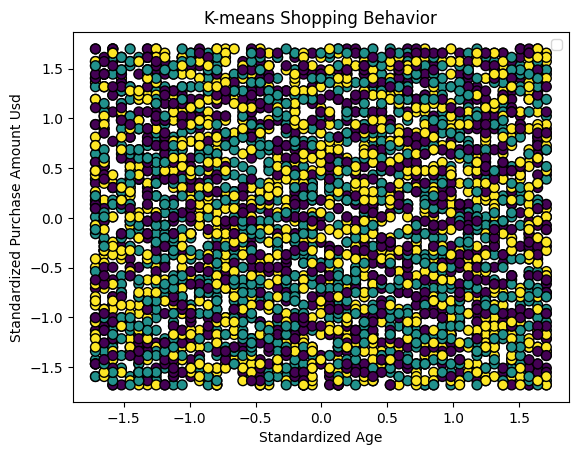

In [48]:
#plotagem
plt.scatter(Y['age'], Y['purchase_amount_usd'], c=y_pred, cmap='viridis', edgecolors='k', s=50)
plt.title('K-means Shopping Behavior')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Purchase Amount Usd')
plt.legend()
plt.show()


Segue abaixo as estatísticas descritivas de cada cluster:

In [49]:
df_c1.describe()

,age,purchase_amount_usd,review_rating,previous_purchases,Male,Cluster
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0
mean,43.991400,60.899922,3.744097,24.748241,0.674746,0.0
std,15.196082,23.737070,0.715562,14.567015,0.468653,0.0
min,18.000000,20.000000,2.500000,1.000000,0.000000,0.0
25%,31.000000,40.000000,3.100000,12.000000,0.000000,0.0
50%,44.000000,61.000000,3.800000,24.000000,1.000000,0.0
75%,57.000000,82.000000,4.300000,37.000000,1.000000,0.0
max,70.000000,100.000000,5.000000,50.000000,1.000000,0.0


In [50]:
df_c2.describe()

,age,purchase_amount_usd,review_rating,previous_purchases,Male,Cluster
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.0
mean,43.782541,59.111458,3.750429,25.941543,0.677319,1.0
std,15.006975,23.761935,0.718177,14.683361,0.467684,0.0
min,18.000000,20.000000,2.500000,1.000000,0.000000,1.0
25%,31.000000,38.000000,3.100000,13.000000,0.000000,1.0
50%,43.000000,58.000000,3.800000,27.000000,1.000000,1.0
75%,57.000000,80.000000,4.400000,39.000000,1.000000,1.0
max,70.000000,100.000000,5.000000,50.000000,1.000000,1.0


In [51]:
df_c3.describe()

,age,purchase_amount_usd,review_rating,previous_purchases,Male,Cluster
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.0
mean,44.416293,59.304933,3.755082,25.362481,0.687593,2.0
std,15.412919,23.540566,0.715472,14.086367,0.463648,0.0
min,18.000000,20.000000,2.500000,1.000000,0.000000,2.0
25%,31.000000,38.000000,3.100000,13.000000,0.000000,2.0
50%,44.000000,60.000000,3.700000,25.000000,1.000000,2.0
75%,57.000000,79.000000,4.400000,37.000000,1.000000,2.0
max,70.000000,100.000000,5.000000,50.000000,1.000000,2.0


In [52]:
df_c1[features_categorics].describe()

,item_purchased,category,location,size,color,season,shipping_type,payment_method,frequency_of_purchases,subscription_status_Yes,discount_applied_Yes
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
unique,25,4,17,4,25,4,6,6,7,2,2
top,Pants,Clothing,Vermont,M,Silver,Winter,Standard,Credit Card,Annually,False,False
freq,61,583,85,571,65,335,221,227,196,931,722


In [53]:
df_c2[features_categorics].describe()

,item_purchased,category,location,size,color,season,shipping_type,payment_method,frequency_of_purchases,subscription_status_Yes,discount_applied_Yes
count,1283,1283,1283,1283,1283,1283,1283,1283,1283,1283,1283
unique,25,4,17,4,25,4,6,6,7,2,2
top,Blouse,Clothing,California,M,Black,Spring,Store Pickup,Credit Card,Every 3 Months,False,False
freq,64,575,95,581,68,348,241,222,193,943,738


In [54]:
df_c3[features_categorics].describe()

,item_purchased,category,location,size,color,season,shipping_type,payment_method,frequency_of_purchases,subscription_status_Yes,discount_applied_Yes
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,25,4,17,4,25,4,6,6,7,2,2
top,Sunglasses,Clothing,Montana,M,Orange,Spring,Free Shipping,Cash,Annually,False,False
freq,70,579,96,603,66,360,242,237,201,973,763


Considerações Finais

Não conseguimos inferir informações a partir do gráfico, imaginamos que seja pelo fato do conjunto ter dados bem distribuído e normalizados (médias e medianas iguais). Além disso, também não conseguimos inferir diferenças significativas nas estatísticas descritivas das features numéricas. Entretanto, é possível observar diferenças nas estatísticas das features categóricas.

Ademais, quando fizemos um teste não normalizando os dados numéricos encontramos diferenças significativas nas estatísticas descritivas numéricas, além das catégoricas, mas preferimos deixar o modelo com normalização pois é importante haver a normalização para treinar modelos de KMeans.

### DBSCAN

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
df_compras = pd.read_csv('shopping_behavior_updated_treated.csv')

X = df_compras.copy()

features_numerics = X.select_dtypes(include=np.number).columns.tolist()
features_categorics = X.select_dtypes(exclude=np.number).columns.tolist()

le = LabelEncoder()
for coluna in features_categorics:
     X[coluna] = le.fit_transform(X[coluna])

scaler = StandardScaler()
X[features_numerics] = scaler.fit_transform(X[features_numerics])

Y = X.copy()
X = X.values

In [57]:
def apply_dbscan_and_metrics(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)

    # Verificar se há pelo menos dois clusters
    unique_labels = np.unique(y_pred)
    if len(unique_labels) < 2:
        print(f'Para EPS={eps}, Min Samples={min_samples}, o DBSCAN não encontrou clusters suficientes.')
        return None, None, None

    # Visualizar os resultados
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k')
    plt.title(f'DBSCAN Clusterização (EPS={eps}, Min Samples={min_samples})')
    plt.show()

    # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

    return silhouette, dunn_index, calinski_harabasz_index

In [58]:
eps_values = [0.05, 0.15, 0.30]
min_samples_values = [5, 10, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f'\n--- Resultados para EPS={eps}, Min Samples={min_samples} ---')
        silhouette, dunn_index, calinski_harabasz_index = apply_dbscan_and_metrics(X, eps, min_samples)
        if silhouette is not None:
            print(f'Silhouette Coefficient: {silhouette:.4f}')
            print(f'Dunn Index: {dunn_index:.4f}')
            print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')


--- Resultados para EPS=0.05, Min Samples=5 ---
Para EPS=0.05, Min Samples=5, o DBSCAN não encontrou clusters suficientes.

--- Resultados para EPS=0.05, Min Samples=10 ---
Para EPS=0.05, Min Samples=10, o DBSCAN não encontrou clusters suficientes.

--- Resultados para EPS=0.05, Min Samples=20 ---
Para EPS=0.05, Min Samples=20, o DBSCAN não encontrou clusters suficientes.

--- Resultados para EPS=0.15, Min Samples=5 ---
Para EPS=0.15, Min Samples=5, o DBSCAN não encontrou clusters suficientes.

--- Resultados para EPS=0.15, Min Samples=10 ---
Para EPS=0.15, Min Samples=10, o DBSCAN não encontrou clusters suficientes.

--- Resultados para EPS=0.15, Min Samples=20 ---
Para EPS=0.15, Min Samples=20, o DBSCAN não encontrou clusters suficientes.

--- Resultados para EPS=0.3, Min Samples=5 ---
Para EPS=0.3, Min Samples=5, o DBSCAN não encontrou clusters suficientes.

--- Resultados para EPS=0.3, Min Samples=10 ---
Para EPS=0.3, Min Samples=10, o DBSCAN não encontrou clusters suficientes.

-

Considerações Finais


Como o conjunto de dados tem uma distribuição normal (médias e medianas iguais), como o DBSCAN é um modelo de decisão baseado no conceito de densidade, isso faz com que o modelo tenha problemas para captar as difenças entre os cluster, pois há uma boa distribuição nos dados (como é possível observar no gráfico do KMeans).

### Agglomerative Clustering

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [63]:
#função para aplicar o agglomerative clustering e calcular métricas
def apply_agglomerative_and_metrics(X, n_clusters, linkage_method):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    y_pred = model.fit_predict(X)

    # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

    return y_pred, silhouette, dunn_index, calinski_harabasz_index

#função para plotar dendrograma
def plot_dendrogram(X, method='single'):
    linkage_matrix = linkage(X, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrograma ({method.capitalize()} Linkage)')
    plt.xlabel('Índice dos Pontos')
    plt.ylabel('Distância')
    plt.show()

#teste com diferentes métodos de linkage
linkage_methods = ['complete', 'single', 'average']
n_clusters_list = [3, 4, 5]

for cluster in n_clusters_list:
    for linkage_method in linkage_methods:
        print(f'\n--- Linkage Method: {linkage_method.capitalize()} ---')
        print(f'--- N Clusters: {cluster} ---')

        #aplicação do agglomerative clustering
        n_clusters = cluster
        y_pred, silhouette, dunn_index, calinski_harabasz_index = apply_agglomerative_and_metrics(X, n_clusters, linkage_method)

        #exibição das métricas
        print(f'Silhouette Coefficient: {silhouette:.4f}')
        print(f'Dunn Index: {dunn_index:.4f}')
        print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')


--- Linkage Method: Complete ---
--- N Clusters: 3 ---
Silhouette Coefficient: 0.2225
Dunn Index: 1.4937
Calinski-Harabasz Index: 2267.2744

--- Linkage Method: Single ---
--- N Clusters: 3 ---
Silhouette Coefficient: -0.1903
Dunn Index: 0.8275
Calinski-Harabasz Index: 1.5476

--- Linkage Method: Average ---
--- N Clusters: 3 ---
Silhouette Coefficient: 0.2213
Dunn Index: 1.5044
Calinski-Harabasz Index: 2157.3547

--- Linkage Method: Complete ---
--- N Clusters: 4 ---
Silhouette Coefficient: 0.2013
Dunn Index: 1.5060
Calinski-Harabasz Index: 1793.4744

--- Linkage Method: Single ---
--- N Clusters: 4 ---
Silhouette Coefficient: -0.2031
Dunn Index: 0.7859
Calinski-Harabasz Index: 1.7195

--- Linkage Method: Average ---
--- N Clusters: 4 ---
Silhouette Coefficient: 0.1902
Dunn Index: 1.4858
Calinski-Harabasz Index: 1706.5943

--- Linkage Method: Complete ---
--- N Clusters: 5 ---
Silhouette Coefficient: 0.1527
Dunn Index: 1.7020
Calinski-Harabasz Index: 1534.3815

--- Linkage Method: Si

Comparando as métricas para cada combinação, observamos que a melhor clusterização é dada para o linkage method "Complete" com 3 clusters.

Silhouette Coefficient: 0.2225

Dunn Index: 1.4937

Calinski-Harabasz Index: 2267.2744

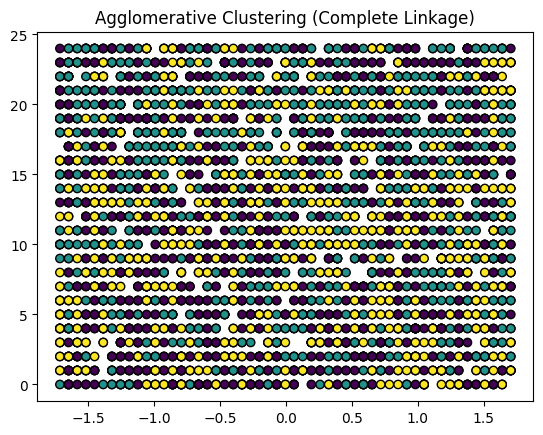

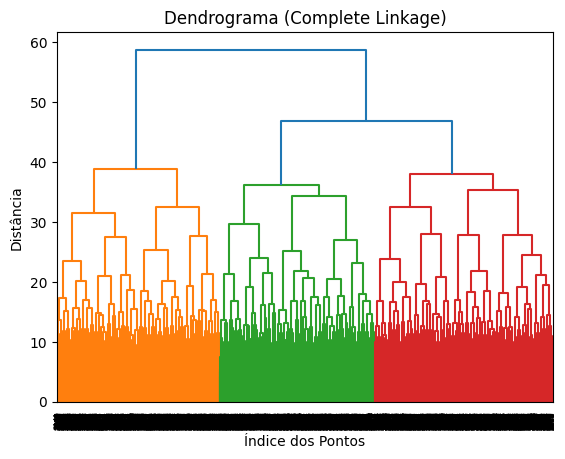

Silhouette Coefficient: 0.2225
Dunn Index: 1.4937
Calinski-Harabasz Index: 2267.2744


In [64]:
#aplicação do agglomerative clustering
n_clusters = 3
linkage_method = 'complete'

y_pred, silhouette, dunn_index, calinski_harabasz_index = apply_agglomerative_and_metrics(X, n_clusters, linkage_method)

#visualização dos resultados
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k')
plt.title(f'Agglomerative Clustering ({linkage_method.capitalize()} Linkage)')
plt.show()

#plotagem do dendrograma
plot_dendrogram(X, method=linkage_method)

#exibição das métricas
print(f'Silhouette Coefficient: {silhouette:.4f}')
print(f'Dunn Index: {dunn_index:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')

In [71]:
# Adicionar rótulos ao DataFrame original
df_compras['Cluster'] = y_pred

# Separação dos clusters
df_c1 = df_compras[df_compras['Cluster'] == 0]
df_c2 = df_compras[df_compras['Cluster'] == 1]
df_c3 = df_compras[df_compras['Cluster'] == 2]

Segue abaixo as estatísticas descritivas de cada cluster:

In [72]:
df_c1.describe()

,age,purchase_amount_usd,review_rating,previous_purchases,Male,Cluster
count,1282.000000,1282.000000,1282.00000,1282.000000,1282.000000,1282.0
mean,43.904836,58.875195,3.75039,25.915757,0.677847,0.0
std,14.938186,23.740696,0.72267,14.593394,0.467484,0.0
min,18.000000,20.000000,2.50000,1.000000,0.000000,0.0
25%,31.000000,38.000000,3.10000,14.000000,0.000000,0.0
50%,43.000000,58.000000,3.70000,27.000000,1.000000,0.0
75%,57.000000,79.000000,4.40000,39.000000,1.000000,0.0
max,70.000000,100.000000,5.00000,50.000000,1.000000,0.0


In [73]:
df_c2.describe()

,age,purchase_amount_usd,review_rating,previous_purchases,Male,Cluster
count,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.0
mean,44.165951,61.087268,3.746638,24.635908,0.676681,1.0
std,15.284173,23.548171,0.719868,14.521075,0.467911,0.0
min,18.000000,20.000000,2.500000,1.000000,0.000000,1.0
25%,31.000000,40.000000,3.100000,12.000000,0.000000,1.0
50%,45.000000,62.000000,3.800000,24.000000,1.000000,1.0
75%,57.000000,82.000000,4.400000,37.000000,1.000000,1.0
max,70.000000,100.000000,5.000000,50.000000,1.000000,1.0


In [74]:
df_c3.describe()

,age,purchase_amount_usd,review_rating,previous_purchases,Male,Cluster
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.0
mean,44.128689,59.182787,3.753279,25.578689,0.686066,2.0
std,15.409925,23.736319,0.705723,14.183418,0.464280,0.0
min,18.000000,20.000000,2.500000,1.000000,0.000000,2.0
25%,31.000000,37.750000,3.200000,13.000000,0.000000,2.0
50%,44.000000,59.000000,3.700000,26.000000,1.000000,2.0
75%,57.000000,80.000000,4.400000,38.000000,1.000000,2.0
max,70.000000,100.000000,5.000000,50.000000,1.000000,2.0


In [77]:
df_c1[features_categorics].describe()

,item_purchased,category,location,size,color,season,shipping_type,payment_method,frequency_of_purchases,subscription_status_Yes,discount_applied_Yes
count,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282
unique,25,4,22,4,25,4,6,6,7,2,2
top,Blouse,Clothing,California,M,Yellow,Spring,Express,Credit Card,Every 3 Months,False,False
freq,69,601,95,589,65,341,226,231,191,941,744


In [76]:
df_c2[features_categorics].describe()

,item_purchased,category,location,size,color,season,shipping_type,payment_method,frequency_of_purchases,subscription_status_Yes,discount_applied_Yes
count,1398,1398,1398,1398,1398,1398,1398,1398,1398,1398,1398
unique,25,4,25,4,25,4,6,6,7,2,2
top,Socks,Clothing,Vermont,M,Maroon,Fall,Free Shipping,PayPal,Annually,False,False
freq,75,659,85,622,73,362,249,251,218,1017,796


In [75]:
df_c3[features_categorics].describe()

,item_purchased,category,location,size,color,season,shipping_type,payment_method,frequency_of_purchases,subscription_status_Yes,discount_applied_Yes
count,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220
unique,25,4,30,4,25,4,6,6,7,2,2
top,Jewelry,Clothing,Montana,M,Olive,Spring,Store Pickup,Cash,Every 3 Months,False,False
freq,70,477,96,544,61,328,211,231,185,889,683


Considerações Finais

Embora o gráfico tenha ficado menos caótico que o do KMeans, ainda não conseguimos inferir informações a partir dele.
No geral, os dados numéricos ficaram semelhantes aos dados numérico do KMeans, sem diferenças significativas nas estatísticas descritivas.

Já nas categóricas, é possível obter informações relevantes que diferenciam os cluster.